#A Simple Discrete Time Signal

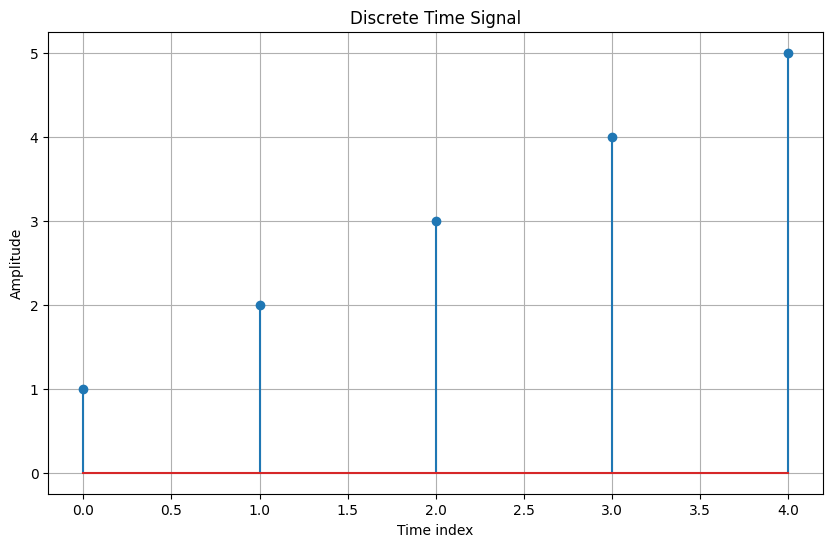

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n = np.array([0, 1, 2, 3, 4]) # Signal Length
x = np.array([1, 2, 3 , 4, 5]) #Amplitude

plt.figure(figsize=(10, 6))
plt.stem(n , x)
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.title('Discrete Time Signal')
plt.grid(True)
plt.show()

#Time shifting of a Signal

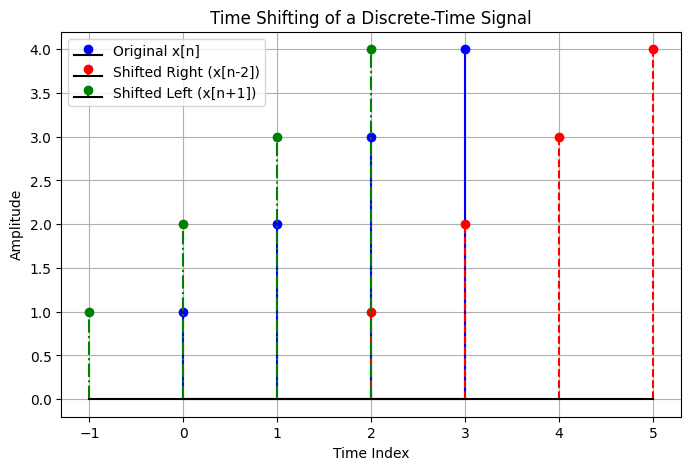

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete-time signal
n = np.array([0, 1, 2, 3])  # Time indices
x = np.array([1, 2, 3, 4])  # Signal values

# Define shift amounts
shift_right = 2
shift_left = -1

# Apply shifting
n_right = n + shift_right  # Shift right
n_left = n + shift_left  # Shift left


plt.figure(figsize=(8, 5))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n_right, x, linefmt='r--', markerfmt='ro', basefmt="k", label='Shifted Right (x[n-2])')
plt.stem(n_left, x, linefmt='g-.', markerfmt='go', basefmt="k", label='Shifted Left (x[n+1])')

plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.title('Time Shifting of a Discrete-Time Signal')
plt.legend()
plt.grid()
plt.show()


#Time Reversal

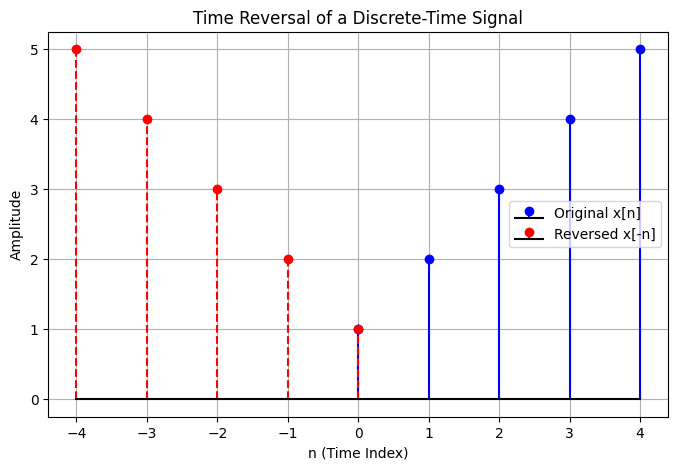

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete time signal
n = np.array([0, 1, 2, 3, 4])  # Time indices
x = np.array([1, 2, 3, 4, 5])  # Signal values

# Time reversal
n_reversed = -n[::-1]  # Reverse the time indices
x_reversed = x[::-1]    # Reverse the signal values


plt.figure(figsize=(8, 5))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n_reversed, x_reversed, linefmt='r--', markerfmt='ro', basefmt="k", label='Reversed x[-n]')
plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Time Reversal of a Discrete-Time Signal')
plt.legend()
plt.grid()
plt.show()


# Applying Even and Odd Concepts

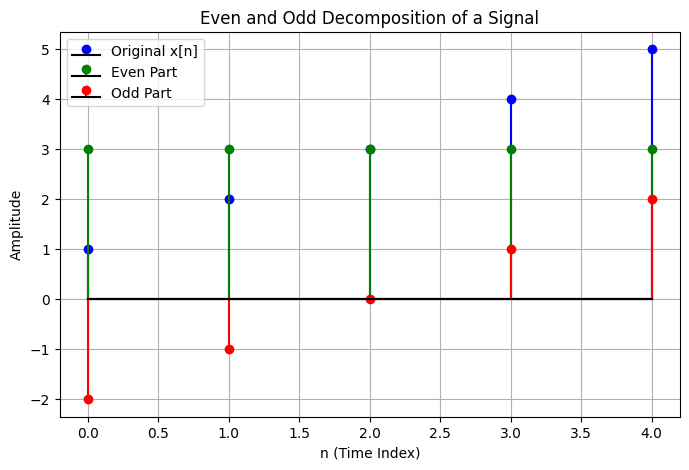

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete-time signal
n = np.array([0, 1, 2, 3, 4])  # Time indices
x = np.array([1, 2, 3, 4, 5])  # Signal values

# Compute even and odd parts
x_reversed = x[::-1]
even_part = 0.5 * (x + x_reversed)
odd_part = 0.5 * (x - x_reversed)

# Plot original, even, and odd signals
plt.figure(figsize=(8, 5))

plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n, even_part, linefmt='g-', markerfmt='go', basefmt="k", label='Even Part')
plt.stem(n, odd_part, linefmt='r-', markerfmt='ro', basefmt="k", label='Odd Part')

plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Even and Odd Decomposition of a Signal')
plt.legend()
plt.grid()
plt.show()


# Convolution of Two Signals
### Recall:
 y[n] = h[n] * x[n]


len[y] = len[x] + len[h] - 1

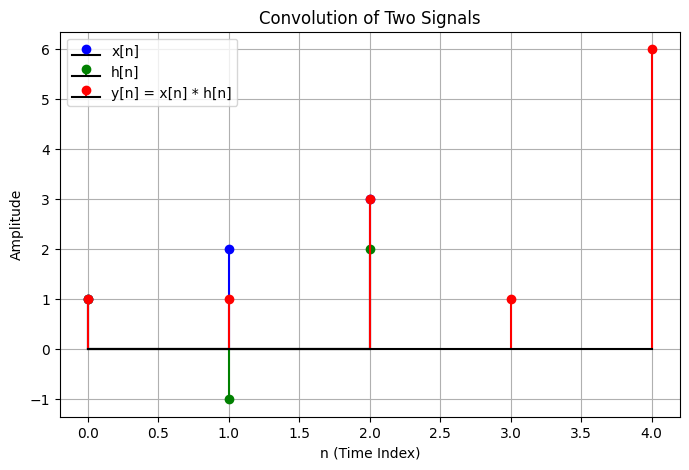

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define two discrete-time signals
x = np.array([1, 2, 3])
h = np.array([1, -1, 2])

# Compute convolution
y = np.convolve(x, h)

# Define time indices
n_x = np.arange(len(x))
n_h = np.arange(len(h))
n_y = np.arange(len(y))

# Plot signals
plt.figure(figsize=(8, 5))
plt.stem(n_x, x, linefmt='b-', markerfmt='bo', basefmt="k", label='x[n]')
plt.stem(n_h, h, linefmt='g-', markerfmt='go', basefmt="k", label='h[n]')
plt.stem(n_y, y, linefmt='r-', markerfmt='ro', basefmt="k", label='y[n] = x[n] * h[n]')

plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Convolution of Two Signals')
plt.legend()
plt.grid()
plt.show()


# Ideal low pass filter
### Recall:
Sinc Function in Time Domain with infinite length


Rectangulare Shape in Frequency Domain with limit from -pi to pi


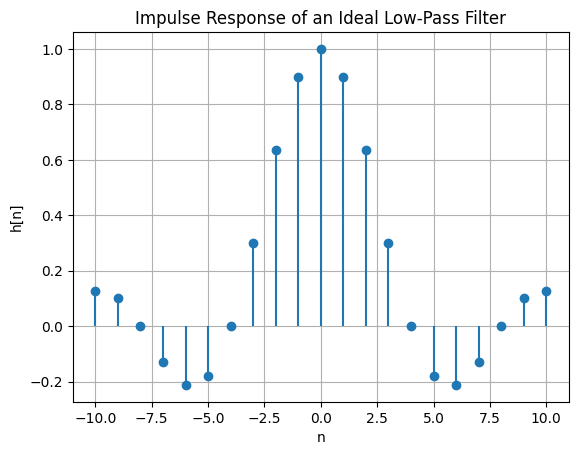

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def ideal_lowpass_filter(cutoff, N):
    """
    Generate the impulse response of an ideal low-pass filter.
    :param cutoff: Cutoff frequency in radians (0 to π)
    :param N: Number of samples (filter length)
    :return: Impulse response h[n]
    """
    n = np.arange(-N//2, N//2 + 1)
    h = np.sinc((cutoff / np.pi) * n)  # sinc function in terms of π
    return n, h

# Define parameters
cutoff_freq = np.pi / 4  # Cutoff at π/4 (normalized frequency)
filter_length = 20

# Generate impulse response
n, h = ideal_lowpass_filter(cutoff_freq, filter_length)

# Plot the impulse response
plt.stem(n, h, basefmt=" ")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Impulse Response of an Ideal Low-Pass Filter")
plt.grid()
plt.show()


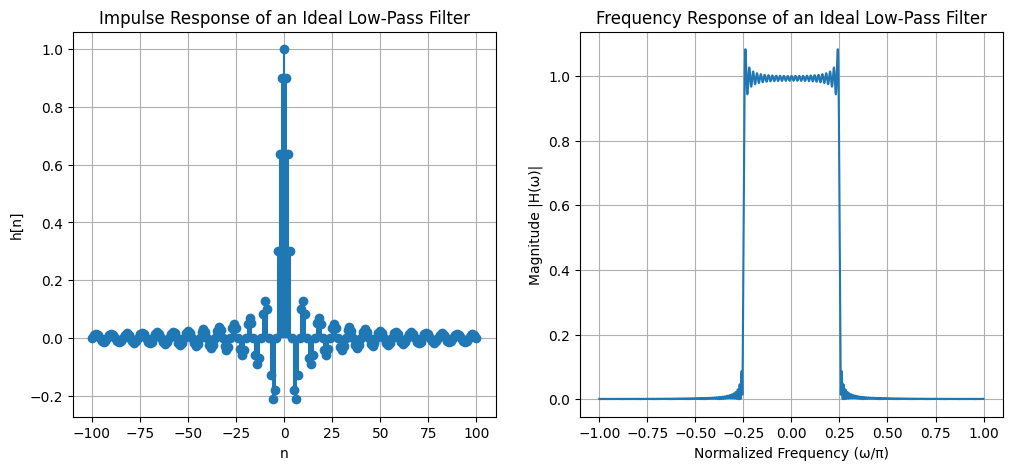

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def ideal_lowpass_filter(cutoff, N):
    """
    Generate the impulse response of an ideal low-pass filter.
    :param cutoff: Cutoff frequency in radians (0 to π)
    :param N: Number of samples (filter length)
    :return: Impulse response h[n]
    """
    n = np.arange(-N//2, N//2 + 1)
    h = np.sinc((cutoff / np.pi) * n)  # sinc function in terms of π
    return n, h

cutoff_freq = np.pi / 4  # Cutoff at π/4 (normalized frequency)
filter_length = 200  # Choose an odd length for symmetry

# Generate impulse response
n, h = ideal_lowpass_filter(cutoff_freq, filter_length)

# Compute frequency response
H = np.fft.fftshift(np.fft.fft(h, 1024))  # Zero-padding for smooth frequency response
freqs = np.linspace(-np.pi, np.pi, len(H))

# Plot the impulse response
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(n, h, basefmt=" ")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Impulse Response of an Ideal Low-Pass Filter")
plt.grid()

# Plot the frequency response
plt.subplot(1, 2, 2)
H = np.fft.fftshift(np.fft.fft(h, 1024)) / np.sum(h)  # Normalize
plt.plot(freqs / np.pi, np.abs(H)) # Normalize x-axis by π
plt.xlabel("Normalized Frequency (ω/π)")

plt.ylabel("Magnitude |H(ω)|")
plt.title("Frequency Response of an Ideal Low-Pass Filter")
plt.grid()

plt.show()


# Define Signal, Step by Step like a game

### First, creating an array for example in this interval: -10 to 10

### Range of impusle response in time domain

In [20]:
import numpy as np
N = 20
n = np.arange(-N//2, N//2 + 1)
print(n)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


### Writing code for sinc function. "h[n]" in Time domain is a sinc function
### In fact impusle response of ideal low pass filter in time domain is a sinc function

In [34]:
omega_c = np.pi / 4
h = np.sinc((omega_c / np.pi) * n)

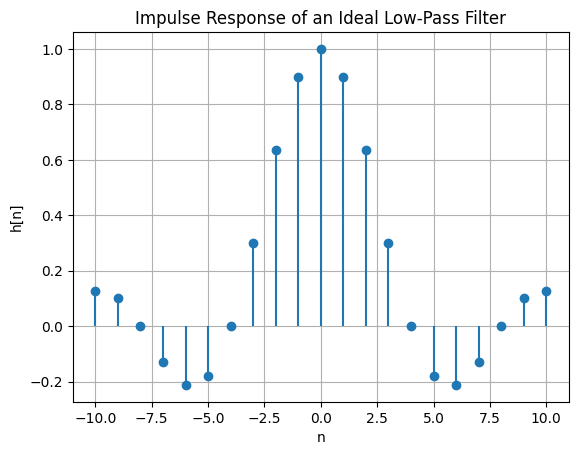

In [35]:
import matplotlib.pyplot as plt
plt.stem(n, h, basefmt=" ")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Impulse Response of an Ideal Low-Pass Filter")
plt.grid()
plt.show()

### Now it's time to transform to frequency domain using FFT.

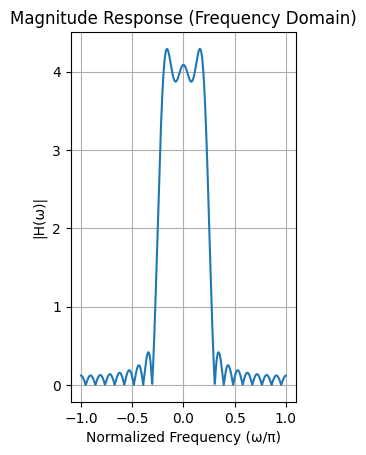

In [36]:
# Compute FFT and shift for proper visualization
H = np.fft.fftshift(np.fft.fft(h, 1024))  # 1024-point FFT for smooth curve
freqs = np.linspace(-np.pi, np.pi, len(H))  # Frequency axis from -π to π

# Plot magnitude response (frequency domain)
plt.subplot(1, 2, 2)
plt.plot(freqs / np.pi, np.abs(H))  # Normalize x-axis to π
plt.xlabel("Normalized Frequency (ω/π)")
plt.ylabel("|H(ω)|")
plt.title("Magnitude Response (Frequency Domain)")
plt.grid()

plt.show()